In [1]:
import os

In [2]:
from transformers import Wav2Vec2Processor, Data2VecAudioModel
import torch
from torch import nn
from datasets import load_dataset
import numpy
import pandas
import seaborn
from sklearn import cluster

In [3]:
dataset = load_dataset("hf-internal-testing/librispeech_asr_demo", "clean", split="validation", trust_remote_code=True)
dataset = dataset.sort("id")
sampling_rate = dataset.features["audio"].sampling_rate

In [46]:
os.remove('C:\\Users\\Edward\\Desktop\\music\\data_mp3\\desktop.ini')

In [48]:
d = './data_mp3/'
listed = [os.path.abspath('{0}{1}'.format(d, x)) for x in os.listdir(d)]
'desktop.ini' in listed

False

In [5]:
from datasets import Dataset, Audio

In [53]:
# https://huggingface.co/docs/datasets/en/audio_dataset

audio_dataset = Dataset.from_dict({"audio": listed}).cast_column("audio", Audio(sampling_rate=16000))
# audio_sampling_rate = 44100
audio_sampling_rate = 16000
audio_dataset[3]["audio"]

{'path': 'C:\\Users\\Edward\\Desktop\\music\\data_mp3\\1AfkQES9PPw__ы1.mp3',
 'array': array([0.        , 0.        , 0.        , ..., 0.14189927, 0.14596349,
        0.17021483]),
 'sampling_rate': 16000}

In [51]:
[x for x in audio_dataset if 'desktop.ini' in x['audio']['path']]

Exception ignored from cffi callback <function SoundFile._init_virtual_io.<locals>.vio_read at 0x000002412AE211C0>:
Traceback (most recent call last):
  File "C:\Users\Edward\Desktop\music_env\Lib\site-packages\soundfile.py", line 1241, in vio_read
    @_ffi.callback("sf_vio_read")

KeyboardInterrupt: 
Exception ignored from cffi callback <function SoundFile._init_virtual_io.<locals>.vio_read at 0x000002412AE211C0>:
Traceback (most recent call last):
  File "C:\Users\Edward\Desktop\music_env\Lib\site-packages\soundfile.py", line 1241, in vio_read
    @_ffi.callback("sf_vio_read")

KeyboardInterrupt: 

KeyboardInterrupt



In [52]:
[x for x in listed if 'desktop.ini' in x]

[]

In [7]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import csv
import io

# Load the model.
model = hub.load('https://www.kaggle.com/models/google/yamnet/TensorFlow2/yamnet/1')

# Input: 3 seconds of silence as mono 16 kHz waveform samples.
waveform = np.zeros(3 * 16000, dtype=np.float32)

# Run the model, check the output.
scores, embeddings, log_mel_spectrogram = model(waveform)
scores.shape.assert_is_compatible_with([None, 521])
embeddings.shape.assert_is_compatible_with([None, 1024])
log_mel_spectrogram.shape.assert_is_compatible_with([None, 64])

# Find the name of the class with the top score when mean-aggregated across frames.
def class_names_from_csv(class_map_csv_text):
    """Returns list of class names corresponding to score vector."""
    class_map_csv = io.StringIO(class_map_csv_text)
    class_names = [display_name for (class_index, mid, display_name) in csv.reader(class_map_csv)]
    class_names = class_names[1:]  # Skip CSV header
    return class_names
class_map_path = model.class_map_path().numpy()
class_names = class_names_from_csv(tf.io.read_file(class_map_path).numpy().decode('utf-8'))
print(class_names[scores.numpy().mean(axis=0).argmax()])  # Should print 'Silence'.


Silence


In [16]:
scores.shape

TensorShape([6, 521])

In [21]:
embeddings.numpy().mean(axis=0).reshape(1, -1)

(1, 1024)

In [12]:
embeddings.shape

TensorShape([6, 1024])

In [11]:
len(class_names)

521

In [13]:
class_names

['Speech',
 'Child speech, kid speaking',
 'Conversation',
 'Narration, monologue',
 'Babbling',
 'Speech synthesizer',
 'Shout',
 'Bellow',
 'Whoop',
 'Yell',
 'Children shouting',
 'Screaming',
 'Whispering',
 'Laughter',
 'Baby laughter',
 'Giggle',
 'Snicker',
 'Belly laugh',
 'Chuckle, chortle',
 'Crying, sobbing',
 'Baby cry, infant cry',
 'Whimper',
 'Wail, moan',
 'Sigh',
 'Singing',
 'Choir',
 'Yodeling',
 'Chant',
 'Mantra',
 'Child singing',
 'Synthetic singing',
 'Rapping',
 'Humming',
 'Groan',
 'Grunt',
 'Whistling',
 'Breathing',
 'Wheeze',
 'Snoring',
 'Gasp',
 'Pant',
 'Snort',
 'Cough',
 'Throat clearing',
 'Sneeze',
 'Sniff',
 'Run',
 'Shuffle',
 'Walk, footsteps',
 'Chewing, mastication',
 'Biting',
 'Gargling',
 'Stomach rumble',
 'Burping, eructation',
 'Hiccup',
 'Fart',
 'Hands',
 'Finger snapping',
 'Clapping',
 'Heart sounds, heartbeat',
 'Heart murmur',
 'Cheering',
 'Applause',
 'Chatter',
 'Crowd',
 'Hubbub, speech noise, speech babble',
 'Children playing'

In [22]:
log_mel_spectrogram

<tf.Tensor: shape=(336, 64), dtype=float32, numpy=
array([[-6.9077554, -6.9077554, -6.9077554, ..., -6.9077554, -6.9077554,
        -6.9077554],
       [-6.9077554, -6.9077554, -6.9077554, ..., -6.9077554, -6.9077554,
        -6.9077554],
       [-6.9077554, -6.9077554, -6.9077554, ..., -6.9077554, -6.9077554,
        -6.9077554],
       ...,
       [-6.9077554, -6.9077554, -6.9077554, ..., -6.9077554, -6.9077554,
        -6.9077554],
       [-6.9077554, -6.9077554, -6.9077554, ..., -6.9077554, -6.9077554,
        -6.9077554],
       [-6.9077554, -6.9077554, -6.9077554, ..., -6.9077554, -6.9077554,
        -6.9077554]], dtype=float32)>

In [24]:
processor = Wav2Vec2Processor.from_pretrained("facebook/data2vec-audio-base-960h")

In [25]:
audio_dataset[0]

{'audio': {'path': 'C:\\Users\\Edward\\Desktop\\music\\data_mp3\\-PVZWsClTPY.mp3',
  'array': array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -1.69366976e-04, -1.44117323e-04, -9.60745892e-05]),
  'sampling_rate': 16000}}

In [41]:
inputs = processor(audio_dataset[0]["audio"]["array"], sampling_rate=audio_sampling_rate, return_tensors="np")
inputs['input_values']

array([[-0.00027167, -0.00027167, -0.00027167, ..., -0.00073102,
        -0.00066254, -0.00053224]], dtype=float32)

In [42]:
waveform.shape

(48000,)

In [43]:
inputs['input_values'].flatten().shape

(3382720,)

In [54]:
produced, idss, paths, vs = [], [], [], []
with torch.no_grad():
    for j in range(len(audio_dataset)):
        print('{0} / {1}'.format(j, len(audio_dataset)))
        inputs = processor(audio_dataset[j]["audio"]["array"], sampling_rate=audio_sampling_rate, return_tensors="np")
        scores, embeddings, log_mel_spectrogram = model(inputs['input_values'].flatten())
        scores.shape.assert_is_compatible_with([None, 521])
        embeddings.shape.assert_is_compatible_with([None, 1024])
        log_mel_spectrogram.shape.assert_is_compatible_with([None, 64])
        pp = embeddings.numpy().mean(axis=0).reshape(1, -1)
        produced.append(pp)
        ids = ''
        path = audio_dataset[j]["audio"]["path"]
        if '__ы' in path:
            v = path[path.index('__ы') + len('__ы'):path.index('.mp3')]
        else:
            v = '0'
        vs.append(v)
        idss.append(ids)
        paths.append(path)
produced_torch = numpy.concatenate(produced, axis=0)
produced_torch

0 / 806
1 / 806
2 / 806
3 / 806
4 / 806
5 / 806
6 / 806
7 / 806
8 / 806
9 / 806
10 / 806
11 / 806
12 / 806
13 / 806
14 / 806
15 / 806
16 / 806
17 / 806
18 / 806
19 / 806
20 / 806
21 / 806
22 / 806
23 / 806
24 / 806
25 / 806
26 / 806
27 / 806
28 / 806
29 / 806
30 / 806
31 / 806
32 / 806
33 / 806
34 / 806
35 / 806
36 / 806
37 / 806
38 / 806
39 / 806
40 / 806
41 / 806
42 / 806
43 / 806
44 / 806
45 / 806
46 / 806
47 / 806
48 / 806
49 / 806
50 / 806
51 / 806
52 / 806
53 / 806
54 / 806
55 / 806
56 / 806
57 / 806
58 / 806
59 / 806
60 / 806
61 / 806
62 / 806
63 / 806
64 / 806
65 / 806
66 / 806
67 / 806
68 / 806
69 / 806
70 / 806
71 / 806
72 / 806
73 / 806
74 / 806
75 / 806
76 / 806
77 / 806
78 / 806
79 / 806
80 / 806
81 / 806
82 / 806
83 / 806
84 / 806
85 / 806
86 / 806
87 / 806
88 / 806
89 / 806
90 / 806
91 / 806
92 / 806
93 / 806
94 / 806
95 / 806
96 / 806
97 / 806
98 / 806
99 / 806
100 / 806
101 / 806
102 / 806
103 / 806
104 / 806
105 / 806
106 / 806
107 / 806
108 / 806
109 / 806
110 / 806


array([[1.5371997e-02, 1.0972545e-01, 1.3725203e-01, ..., 1.2266288e-01,
        9.9623628e-02, 1.7295795e-02],
       [4.4067204e-03, 1.9124188e-01, 3.1478509e-01, ..., 4.1927788e-02,
        4.9316045e-02, 0.0000000e+00],
       [2.1826476e-03, 6.4849190e-02, 4.7091493e-01, ..., 1.9349930e-01,
        4.7152691e-02, 0.0000000e+00],
       ...,
       [2.7820806e-04, 1.2472189e-01, 3.4720165e-01, ..., 3.5310555e-01,
        9.0319857e-02, 0.0000000e+00],
       [9.2100352e-03, 1.6309668e-01, 1.4846559e-01, ..., 2.5956732e-01,
        5.0027955e-02, 1.4102048e-02],
       [2.6054129e-03, 1.4765893e-01, 4.1977856e-02, ..., 6.7099027e-02,
        7.4386694e-02, 0.0000000e+00]], dtype=float32)

In [55]:
produced_torch = numpy.concatenate(produced, axis=0)
produced_torch

array([[1.5371997e-02, 1.0972545e-01, 1.3725203e-01, ..., 1.2266288e-01,
        9.9623628e-02, 1.7295795e-02],
       [4.4067204e-03, 1.9124188e-01, 3.1478509e-01, ..., 4.1927788e-02,
        4.9316045e-02, 0.0000000e+00],
       [2.1826476e-03, 6.4849190e-02, 4.7091493e-01, ..., 1.9349930e-01,
        4.7152691e-02, 0.0000000e+00],
       ...,
       [2.7820806e-04, 1.2472189e-01, 3.4720165e-01, ..., 3.5310555e-01,
        9.0319857e-02, 0.0000000e+00],
       [9.2100352e-03, 1.6309668e-01, 1.4846559e-01, ..., 2.5956732e-01,
        5.0027955e-02, 1.4102048e-02],
       [2.6054129e-03, 1.4765893e-01, 4.1977856e-02, ..., 6.7099027e-02,
        7.4386694e-02, 0.0000000e+00]], dtype=float32)

In [56]:
produced_torch.shape

(806, 1024)

In [57]:
import umap
import hdbscan

In [58]:
mapper = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=2,
    random_state=42,
)

clusterable_embedding = mapper.fit_transform(produced_torch)

C:\Users\Edward\Desktop\music_env\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [62]:
scanner_hdbscan = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
)

labels_hdbscan = scanner_hdbscan.fit_predict(clusterable_embedding)

In [69]:
scanner_kmeans = cluster.KMeans(n_clusters=6)

labels_kmeans = scanner_kmeans.fit_predict(clusterable_embedding)

In [70]:
data = pandas.DataFrame(data=clusterable_embedding, columns=['x1', 'x2'])
data['labels_hdbscan'] = labels_hdbscan
data['labels_kmeans'] = labels_kmeans
data['id'] = idss
data['path'] = paths
data['vs'] = vs
data

,x1,x2,labels_hdbscan,labels_kmeans,id,path,vs
0,8.167652,20.324039,-1,3,,C:\Users\Edward\Desktop\music\data_mp3\-PVZWsC...,0
1,9.763319,20.364193,-1,3,,C:\Users\Edward\Desktop\music\data_mp3\0j7_Tb4...,0
2,7.932341,20.323944,-1,3,,C:\Users\Edward\Desktop\music\data_mp3\0poLsDf...,0
3,9.856360,20.285425,-1,3,,C:\Users\Edward\Desktop\music\data_mp3\1AfkQES...,1
4,9.790640,20.604542,-1,3,,C:\Users\Edward\Desktop\music\data_mp3\1AfkQES...,10
...,...,...,...,...,...,...,...
801,6.395244,20.584293,-1,3,,C:\Users\Edward\Desktop\music\data_mp3\z0jOyz2...,8
802,6.387815,20.592772,-1,3,,C:\Users\Edward\Desktop\music\data_mp3\z0jOyz2...,9
803,6.479369,20.576578,-1,3,,C:\Users\Edward\Desktop\music\data_mp3\zeYu80u...,0
804,9.402470,19.358154,-1,3,,C:\Users\Edward\Desktop\music\data_mp3\ZSmJVeu...,0


<Axes: xlabel='x1', ylabel='x2'>

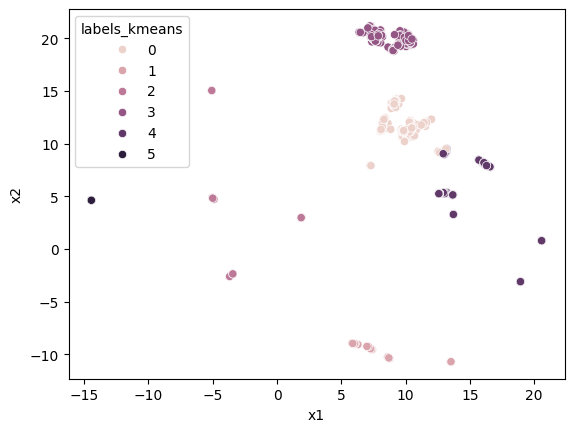

In [71]:
seaborn.scatterplot(data=data, x="x1", y="x2", hue="labels_kmeans")

In [72]:
data[data['labels_kmeans'] == 2]

,x1,x2,labels_hdbscan,labels_kmeans,id,path,vs
330,-5.019726,4.846660,-1,2,,C:\Users\Edward\Desktop\music\data_mp3\gBZi2w1...,1
331,-4.963316,4.790059,-1,2,,C:\Users\Edward\Desktop\music\data_mp3\gBZi2w1...,10
332,-5.011189,4.838051,-1,2,,C:\Users\Edward\Desktop\music\data_mp3\gBZi2w1...,11
333,-4.943319,4.770009,-1,2,,C:\Users\Edward\Desktop\music\data_mp3\gBZi2w1...,12
334,-4.987681,4.814665,-1,2,,C:\Users\Edward\Desktop\music\data_mp3\gBZi2w1...,13
...,...,...,...,...,...,...,...
621,1.892259,2.995041,-1,2,,C:\Users\Edward\Desktop\music\data_mp3\QlXrndl...,5
622,1.900539,3.004099,-1,2,,C:\Users\Edward\Desktop\music\data_mp3\QlXrndl...,6
623,1.882574,2.986000,-1,2,,C:\Users\Edward\Desktop\music\data_mp3\QlXrndl...,7
624,1.861348,2.964662,-1,2,,C:\Users\Edward\Desktop\music\data_mp3\QlXrndl...,8


In [73]:
data.to_excel('labeled.xlsx')

In [23]:
dataset[0]["audio"]["path"]

'C:/Users/Edward/.cache/huggingface/datasets/downloads/extracted/5bcdfe32bf897be9d35b8459d665a1979e1388392378913b3c587390c05864c3/dev_clean/1272/128104\\1272-128104-0000.flac'

In [24]:
dataset[0]['id']

'1272-128104-0000'